In [18]:
! pwd 
! ls -al
import pandas as pd
import numpy as np
#https://jse.amstat.org/v19n3/decock/DataDocumentation.txt
df_orig = pd.read_csv('AmesHousing.csv')
df_orig.drop(['PID','Order'], axis=1, inplace=True)
df_orig.head()
# drop ORDER & PID

rows, cols = df_orig.shape
print(f"Rows: {rows}, Columns: {cols}")
# Identify missing values
missing_values = df_orig.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
df_orig.head()

/Users/r.cunningham/Desktop/PgCert/university_assignment_2025
total 5432
drwxr-xr-x@ 12 r.cunningham  staff     384 Mar 30 21:26 .
drwxr-xr-x@  8 r.cunningham  staff     256 Mar 30 21:26 ..
drwxr-xr-x@ 14 r.cunningham  staff     448 Mar 30 12:44 .git
-rw-rw-r--   1 r.cunningham  staff  963738 Mar 30 20:13 AmesHousing.csv
-rwx------@  1 r.cunningham  staff  224708 Mar 30 19:55 AssignmentPaperDraft.pages
-rw-r--r--   1 r.cunningham  staff      28 Mar 25 20:16 README.md
-rw-r--r--@  1 r.cunningham  staff   37074 Mar 30 20:24 assignment.ipynb
-rw-r--r--@  1 r.cunningham  staff    8823 Mar 25 20:16 assignment_notes
-rw-r--r--   1 r.cunningham  staff  662306 Mar 30 21:26 assignment_prepare_for_k.ipynb
-rw-r--r--@  1 r.cunningham  staff  287651 Mar  1 11:49 assignment_stuff.pdf
-rw-r--r--   1 r.cunningham  staff  515824 Mar 30 20:45 assignment_with_k.ipynb
drwxr-xr-x@  8 r.cunningham  staff     256 Mar 30 21:24 venv
Rows: 2930, Columns: 80
There are 15749 empty values in the dataframe.


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [19]:
# Get a list of categorical and numeric columns
#
# train_df.dtypes → Returns the data type of each column.
# train_df.dtypes != "object" → Filters numerical columns (int64, float64).
# train_df.dtypes == "object" → Filters categorical columns (object data type).
# .index.tolist() → Converts the column index to a list for easier use.



numerical_df = df_orig.dtypes[df_orig.dtypes != "object"].index
numerical_column_names=numerical_df.to_list()
categorical_df = df_orig.dtypes[df_orig.dtypes == "object"].index
categorical_column_names=categorical_df.to_list()
print('\nNumerical Columns:')
print(numerical_column_names)
print('\nCategorical Columns:')
print(categorical_column_names)


Numerical Columns:
['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

Categorical Columns:
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating 

Data Exploration

The chart is a histogram with a kernel density estimate (KDE) overlay, showing the distribution of sale prices.
Key Elements of the Chart:

- X-Axis (Sale Prices): Represents the range of sale prices for the properties.
- Y-Axis (Frequency): Indicates how often a sale price falls within a particular range.
- Histogram Bars: The bars show the frequency of sales within each price range. Taller bars indicate more frequent sales in that price range.
- KDE Curve (Blue Line): This is a smoothed line that estimates the probability density function of sale prices, giving a clearer view of the distribution shape.

Insights from the Chart:

- Right-Skewed Distribution:
    The distribution is right-skewed, meaning there are a few high-priced outliers that pull the tail to the right. Most sales are concentrated in the lower price ranges.

- Common Sale Price Range:
    The highest concentration of sales appears to be between $100,000 and $200,000, indicating that this is the most common sale price range.

- Outliers:
    Prices above $400,000 are less frequent, suggesting these are outliers or premium properties.

- Long Tail:
    The long tail on the right suggests that while luxury or high-end properties exist, they are less common in the dataset.

This can reduce our model performance so we will run some outlier removal

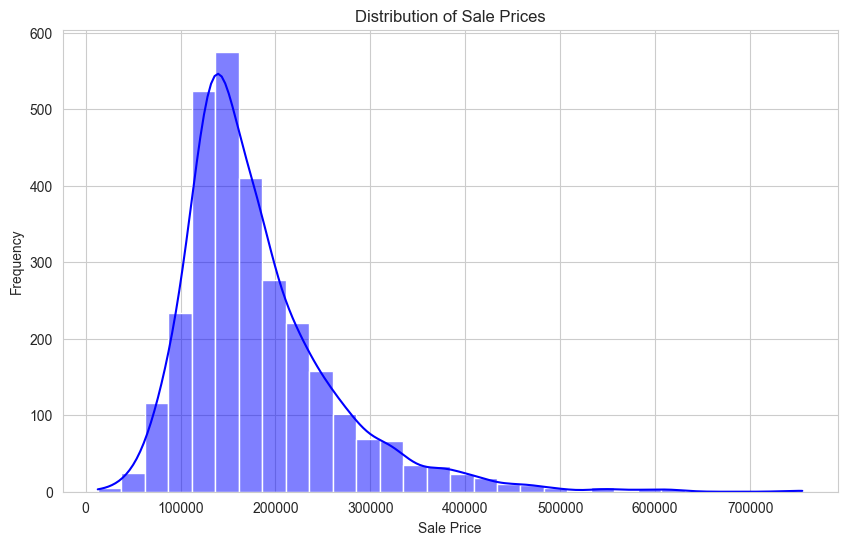

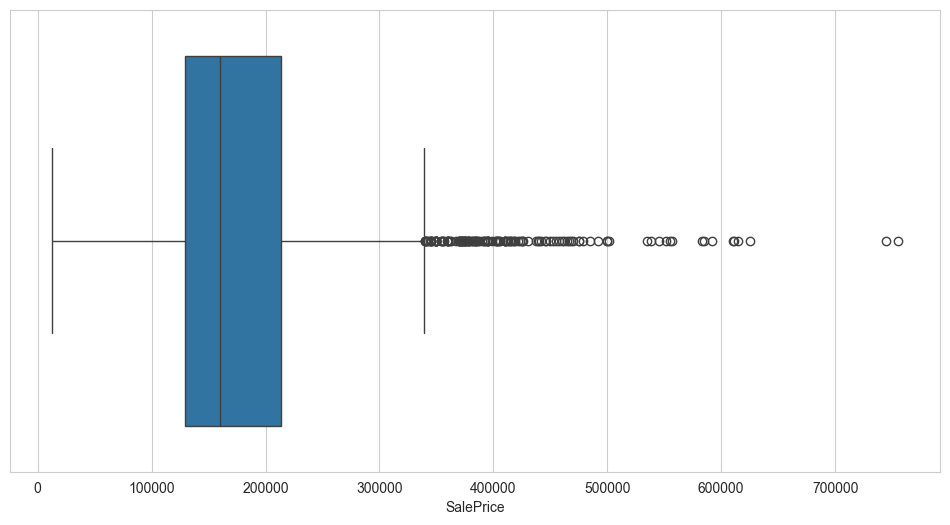

Number of outliers: 137
Target var = SalePrice


In [20]:
target_var='SalePrice'
transform=False
df_orig['SalePrice'].isnull().any()
df_orig['SalePrice'].describe()
# Here we see the SalePrice descriptive statistics. 
# The mean is greater than the median which can indicate a positive or 
# right skewededness. We can confirm this by visualizing the data.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_orig['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def show_outliers(df):
    '''
    Insights from Boxplots on SalePrice Outliers

    The boxplot of SalePrice revealed the following insights about outliers:

        Presence of High-Value Outliers

            There are several high-end properties with significantly higher prices than the majority of homes.

            These luxury homes may have unique features (e.g., larger lot size, premium locations, high-quality materials) that make them different from the typical market.

            If these outliers are not removed or transformed, they could impact model performance by skewing predictions.

        Lower-End Outliers Are Less Frequent

            There are fewer extreme low-end home prices compared to the high-end outliers.

            The minimum home prices seem closer to the majority of the dataset, suggesting that extremely low-value properties are not as unusual.

        Distribution is Right-Skewed

            The boxplot confirms right-skewness, meaning most homes are in the lower price range, while a smaller number of high-end properties pull the distribution to the right.

            A log transformation on SalePrice might be useful to normalize the data.

        Possible Need for Outlier Handling

            If extreme outliers do not represent typical homes, removing them could help model generalization.'
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df["SalePrice"])
    plt.show()


    Q1 = df["SalePrice"].quantile(0.25)
    Q3 = df["SalePrice"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df["SalePrice"] < lower_bound) | (df["SalePrice"] > upper_bound)]
    print(f"Number of outliers: {len(outliers)}")

def transform_sale_price(target_var,orig_target_var):
    """
    Apply log transformation to the SalePrice column.

    Args:
        df (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The DataFrame with the log-transformed SalePrice column.
    Why Use Log-Transformed SalePrice as the Target?

        Reduces Skewness:

            The original SalePrice is right-skewed, meaning that some very expensive houses disproportionately affect the model.

            The log transformation normalizes the distribution, making it closer to a normal (Gaussian) distribution, which many models assume.

        Improves Model Performance:

            Linear regression and tree-based models often perform better with log-transformed targets because they handle proportional relationships rather than absolute differences.

        Prevents Overfitting:

            Without transformation, models might overly focus on extreme high values, causing instability.

            Log transformation ensures that percentage differences matter more than absolute differences.

    """
    # Apply log transformation

    # Apply log transformation
    log_Sale_price="Log_SalePrice"
    df_orig[target_var] = np.log1p(df_orig[orig_target_var])

    # Compare distributions before and after transformation
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original SalePrice Distribution
    sns.histplot(df_orig[target_var], bins=30, kde=True, ax=axes[0])
    axes[0].set_title("Original SalePrice Distribution")

    # Log Transformed SalePrice Distribution
    sns.histplot(df_orig[target_var], bins=30, kde=True, ax=axes[1], color="orange")
    axes[1].set_title("Log Transformed SalePrice Distribution")

    plt.show()

    return df_orig
show_outliers(df_orig)
if transform:
    orig_target_var=target_var
    target_var='Log_SalePrice'
    df_orig=transform_sale_price(target_var,orig_target_var)
print(f'Target var = {target_var}')

*House prices by neighborhood*



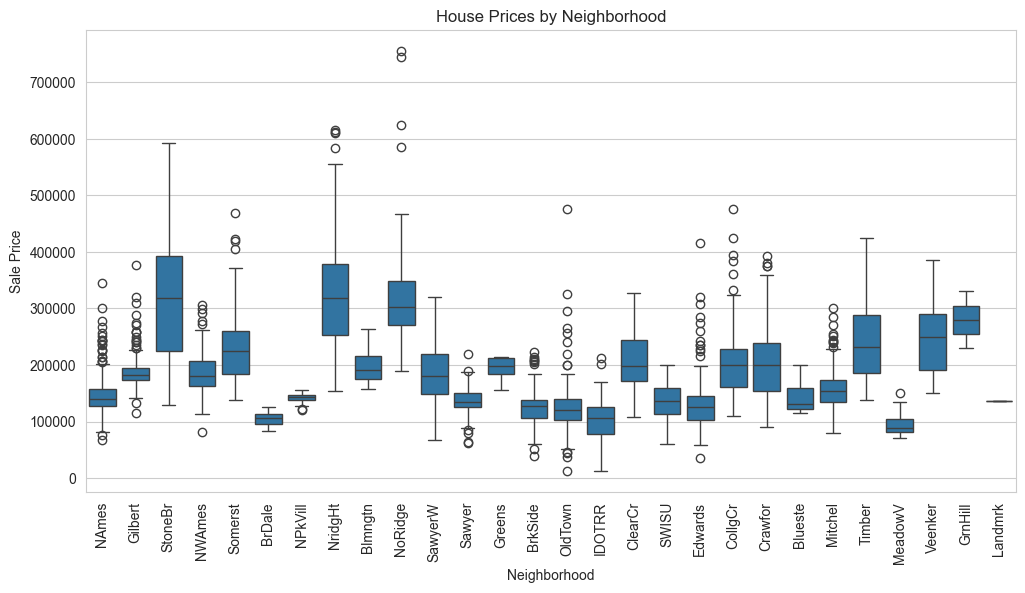

In [21]:
# Boxplot of SalePrice by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df_orig)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("House Prices by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.show()



*Correlation heatmap for numeric features*

Analyzing Correlation with SalePrice

In this step, we analyze the correlation between SalePrice and all other features. 
First, we visualize the full correlation matrix using a heatmap to identify strong relationships between features.
Next, we calculate and sort the correlation of each feature with SalePrice to identify 
which features have the most influence on the target variable. This analysis helps in selecting the most 
important features for the regression model.

We can optionally drop values with low correlation values.

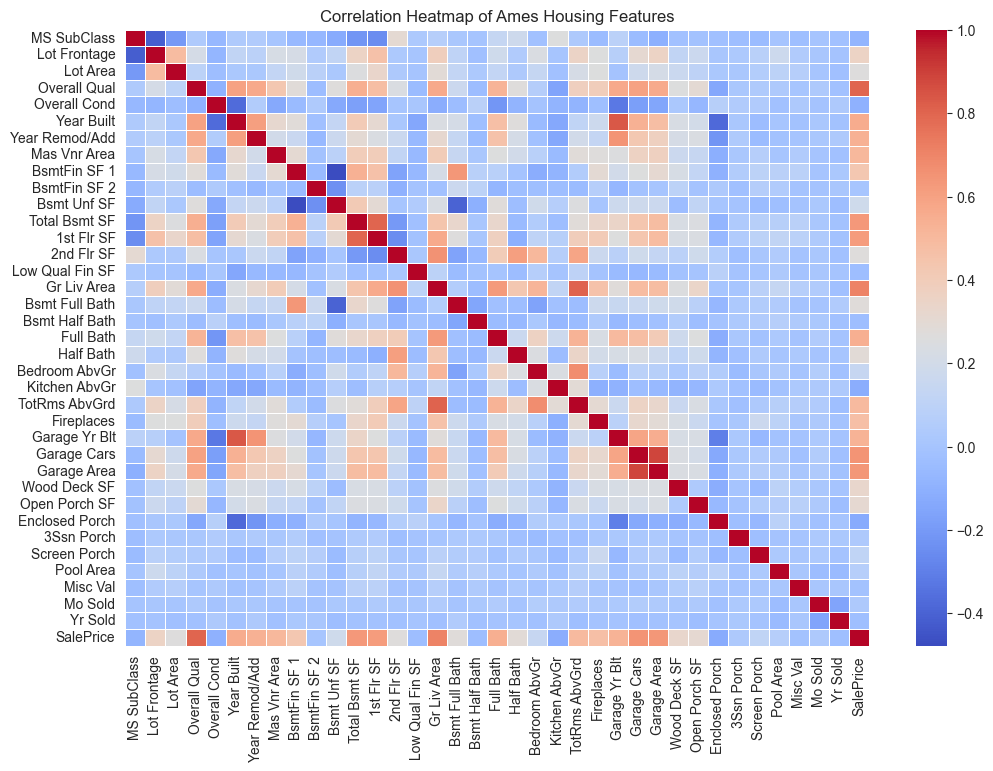

Correlation of features with 'SalePrice':
SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Enclosed Porch     0.128787
Kitchen AbvGr      0.119814
Screen Porch       0.112151
Overall Cond       0.101697
MS SubClass        0.085092
Pool Area          0.068403
Low Qual Fin SF    0.037660
Bsmt Half Bath     0.035835
Mo Sold            0.035259
3Ssn Porch         0.032225
Yr Sol

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_orig.corr(numeric_only=True), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Ames Housing Features")
plt.show()

matrix = np.abs(df_orig[numerical_df].corr())
correlation_to_saleprice = matrix['SalePrice'].sort_values(ascending=False)
print("Correlation of features with 'SalePrice':")
print(correlation_to_saleprice)


def do_drop(drop_list):
    train_df = train_df.drop(columns=[col for col in drop_list if col in train_df.columns], axis=1)
    train_df

    # Show only rows that contain NaN values
    train_df[train_df.isnull().any(axis=1)]


correlation_threshold = 0.1
would_drop_list = correlation_to_saleprice[correlation_to_saleprice < correlation_threshold].index.tolist()
print(f'Would drop list ={would_drop_list}')
drop=False
if drop:
    do_drop(would_drop_list)


*Define feature groups*

I've gone to https://jse.amstat.org/v19n3/decock/DataDocumentation.txt and used a list of location related variables to generate a list of property related variables.

In [23]:
import sys
# Created Manually
all_location_variables=['MS Zoning',
                    'Neighborhood',
                    'Condition 1',
                    'Condition 2',
                    'Lot Frontage',
                    'Street',
                    'Alley',
                    'Lot Shape',
                    'Land Contour',
                    'Lot Config',
                    'Land Slope',
                    'Utilities'
                    ]

# important_location_variables=['MSZoning',
#                     'Neighborhood',
#                     'Condition1',
#                     'Condition2',
#                     'Utilities'
#                     ]


# Get a list of all columns in the dataset
column_list = df_orig.columns.tolist()

def check_is_sublist(list1, list2):
    errors=[]
    for i in list1:
        if i not in list2:
            errors.append(i)
    if errors:
        print("The following variables are not in list2: ",errors)
        sys.exit(1)

check_is_sublist(all_location_variables,column_list)

def create_list_of_property_variables():
    property_variables=[]
    for c in column_list:
        if c not in all_location_variables:
            property_variables.append(c)
    return property_variables

property_variables=create_list_of_property_variables()

print("Property Variables: ", property_variables)
print("Location Variables: ", all_location_variables)

Property Variables:  ['MS SubClass', 'Lot Area', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale 

Handle missing values etc

- For columns with numeric values ​​- fill empty values ​​with the column mean.
- For columns with categorical values ​​- we will fill empty values ​​with the most common value in the column

Common Thresholds

- Above 60-70% missing: Consider dropping unless the column is critical.
- 30-60% missing: Consider imputing if the feature is valuable.
- Below 30% missing: Usually worth imputing rather than dropping.

In this case
- 'Pool QC' (99.6%), 'Misc Feature' (96.4%), 'Alley' (93.2%), and 'Fence' (80.5%) → Likely not useful and can be dropped.- 
- 'Fireplace Qu' (48.6%) → Might be worth imputing if fireplaces impact home values.

In [24]:
# Identify missing values
missing_values = df_orig.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a DataFrame with missing count and percentage
missing_values_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': (missing_values.values / len(df_orig)) * 100
})

# Sort by highest missing percentage
missing_values_df = missing_values_df.sort_values(by='Missing Percentage', ascending=False)

# Display the result
print(missing_values_df)

rows, cols = df_orig.shape
print(f"Rows: {rows}, Columns: {cols}")

There are 15749 empty values in the dataframe.
            Column  Missing Count  Missing Percentage
24         Pool QC           2917           99.556314
26    Misc Feature           2824           96.382253
1            Alley           2732           93.242321
25           Fence           2358           80.477816
2     Mas Vnr Type           1775           60.580205
16    Fireplace Qu           1422           48.532423
0     Lot Frontage            490           16.723549
23     Garage Cond            159            5.426621
22     Garage Qual            159            5.426621
19   Garage Finish            159            5.426621
18   Garage Yr Blt            159            5.426621
17     Garage Type            157            5.358362
6    Bsmt Exposure             83            2.832765
9   BsmtFin Type 2             81            2.764505
5        Bsmt Cond             80            2.730375
4        Bsmt Qual             80            2.730375
7   BsmtFin Type 1             80  

In [25]:

def do_drop(df):
    threshold = 0.80  # 80%
    cols_to_drop = missing_values_df[missing_values_df['Missing Percentage'] > (threshold * 100)]['Column'].tolist()
    print(f"Columns to drop: {cols_to_drop}")
    df_cleaned = df.drop(columns=cols_to_drop)
    return df_cleaned

def do_impute(df):
    # Impute missing values
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical columns
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # Numeric columns
            df[col].fillna(df[col].mean(), inplace=True)
    return df
df=df_orig



drop=False
df=df_orig
if drop:
    df=do_drop(df)
df_cleaned=do_impute(df)


# Identify missing values
missing_values = df_cleaned.isnull().sum()
count_missing=len(np.where(df_orig.isnull())[0])
print(f'There are {count_missing} empty values in the dataframe.')
rows, cols = df_cleaned.shape
print(f"Rows: {rows}, Columns: {cols}")
# RETURN DF_CLEANED

There are 0 empty values in the dataframe.
Rows: 2930, Columns: 80


/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_5009/411754907.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/r1/hp5_t9m54pjfz3ymsmkxcltc0000gp/T/ipykernel_5009/411754907.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

Encode Categorical Variables

NOTE: WE HAVE ADDED LOTS OF EXTRA COLUMS

In [26]:
from sklearn.preprocessing import OneHotEncoder

train_df = df_cleaned.copy()

# Identify categorical features
categorical_cols = categorical_column_names

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit-transform and convert to dataframe
encoded_array = encoder.fit_transform(train_df[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with numerical features and drop original categorical columns
df_encoded = pd.concat([train_df.drop(columns=categorical_cols), encoded_df], axis=1)
df_encoded.head()
rows, cols = df_encoded.shape
print(f"Rows: {rows}, Columns: {cols}")
df_encoded.head()

Rows: 2930, Columns: 261


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Create Training and Test Sets

Key Parameters in train_test_split

- test_size=0.2 → 20% of the data goes to the test set, and 80% to the training set.
- random_state=42 → Ensures reproducibility of the split.
- X contains the independent variables (features).
- y contains the dependent variable (target).

In [27]:
from sklearn.model_selection import train_test_split
# Define target variable (House Price)
target = target_var

print("Target Variable:", target)

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=[target])  # Independent variables
y = df_encoded[target]  # Dependent variable

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test

Target Variable: SalePrice


1357    161000
2367    116000
2822    196500
2126    123600
1544    126000
         ...  
2268    187500
456     552000
462     173000
2168    118500
1488    147500
Name: SalePrice, Length: 586, dtype: int64

Random Forest performs better than Linear Regression on all three metrics:

    Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual prices.

        Random Forest (15,820.78) < Linear Regression (16,637.43) → Lower is better.

    Root Mean Squared Error (RMSE): Measures the standard deviation of prediction errors.

        Random Forest (26,812.54) < Linear Regression (36,011.37) → Lower is better.

    R² Score: Measures how well the model explains variance in the target variable.

        Random Forest (0.9103) > Linear Regression (0.8383) → Closer to 1 is better.

Insights:

    Random Forest outperforms Linear Regression significantly, especially in RMSE and R², meaning it generalizes better and captures non-linear relationships effectively.

    Linear Regression might struggle with complex relationships in the data, especially if interactions between features and non-linearity exist.

    If interpretability is important, Linear Regression is easier to explain, while Random Forest is more of a "black box."

Next Steps:

    Feature Engineering: If you want to improve Linear Regression, consider interactions, polynomial terms, or feature selection.

    Hyperparameter Tuning: For Random Forest, tuning parameters (like the number of trees, max depth, etc.) could improve results.

    Exploring Other Models: Try Gradient Boosting (e.g., XGBoost, LightGBM) if you want even better performance.

In [28]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2}

# Define models
models = [
    (LinearRegression(), "Linear Regression (All Features)"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest (All Features)"),
]

# Store results
results = []

# Train and evaluate models
for model, name in models:
    results.append(train_and_evaluate(X_train, X_test, y_train, y_test, model, name))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                              Model           MAE          RMSE        R²
0  Linear Regression (All Features)  16637.430886  36011.367356  0.838252
1      Random Forest (All Features)  15820.782526  26812.545368  0.910333


Feature Importance Analysis (Random Forest)

Key Findings

The most important features in predicting house prices are:

- Gr Liv Area (Above-Ground Living Area)
- Overall Qual (Overall Material and Finish Quality)
- Total Bsmt SF (Total Basement Area)
- Garage Cars (Number of Garage Spaces)
- Year Built (Construction Year)

Location-related features (e.g., Neighborhood, Lot Frontage) have lower importance than property-related features.

Property features dominate price prediction, confirming that aspects like size, quality, and amenities matter more than location.

Location still has some influence, but it does not significantly outperform direct property characteristics.

AI models trained on housing data tend to prioritize tangible home characteristics over neighborhood effects, which can be important in real estate valuation, lending, and urban planning.


           Feature  Importance
3     Overall Qual    0.605049
15     Gr Liv Area    0.105141
12      1st Flr SF    0.034974
11   Total Bsmt SF    0.027544
8     BsmtFin SF 1    0.022675
13      2nd Flr SF    0.022559
18       Full Bath    0.017009
2         Lot Area    0.016425
26     Garage Area    0.016033
25     Garage Cars    0.015097
5       Year Built    0.009937
6   Year Remod/Add    0.008177
1     Lot Frontage    0.006112
7     Mas Vnr Area    0.004803
10     Bsmt Unf SF    0.004800


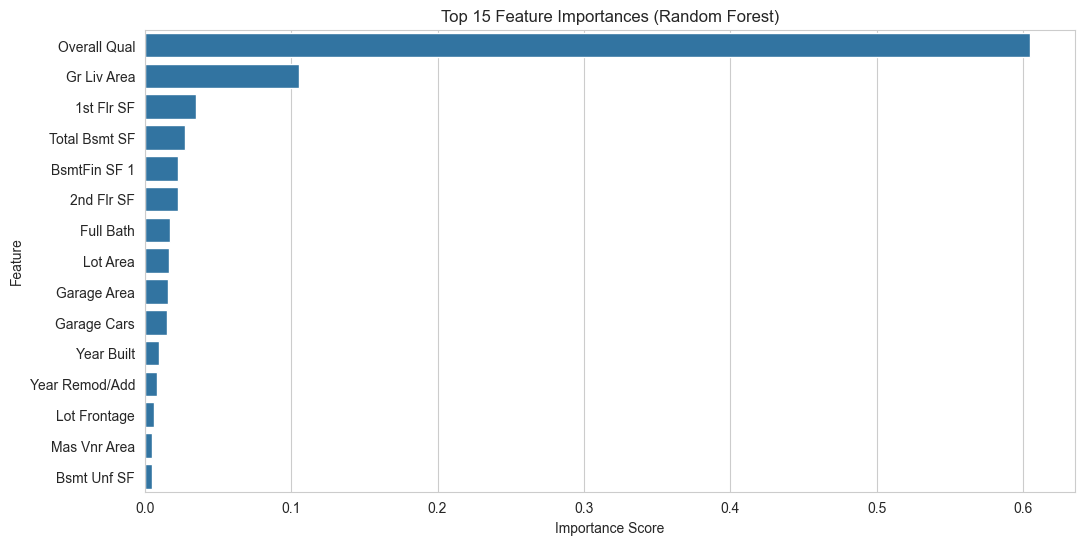

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest on All Features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display feature importance rankings
print(feature_importances.head(15))

# Visualizing Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(15))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Visualize Feature Importance Using SHAP


Key Insights from the SHAP Summary Plot

    Most Important Features

        Overall Qual (Overall Material and Finish Quality) has the highest impact on price predictions.

        Gr Liv Area (Above-Ground Living Area) and Total Bsmt SF (Total Basement Size) are also highly influential.

        1st Flr SF, Garage Area, and Year Built contribute significantly.

    How SHAP Values Work

        Each dot represents a single data point.

        Red dots (high feature values) are mostly on the right, showing a positive impact on price.

        Blue dots (low feature values) are mostly on the left, indicating a negative effect.

        Example: Higher Overall Qual (red) increases house prices, while lower values (blue) decrease them.

    Limited Impact of Location-Based Features

        Location-related variables such as Neighborhood are missing from the top-ranking features.

        This suggests that property-related attributes dominate price predictions, even with location data present.

 95%|=================== | 557/586 [00:20<00:01]       

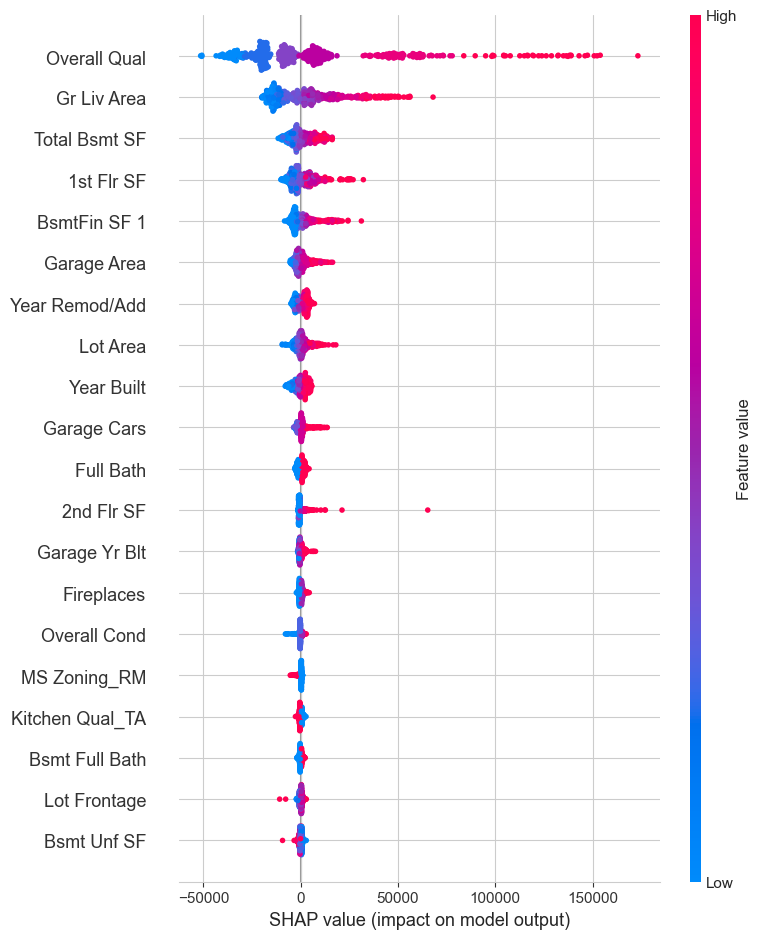

In [30]:
import shap
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor

# # Define and train the Random Forest model without location features
# rf_model_no_loc = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model_no_loc.fit(X_train_no_location, y_train)

# Train Random Forest model on all features (including location)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Initialize SHAP explainer
explainer = shap.Explainer(rf_model, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

Remove Location Features from Dataset

In [31]:
# Create a dataset without location features
X_train_no_location = X_train.drop(columns=[col for col in all_location_variables if col in X_train.columns], errors='ignore')
X_test_no_location = X_test.drop(columns=[col for col in all_location_variables if col in X_test.columns], errors='ignore')
X_test_no_location


,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1357,70,5100,8,7,1925,1996,0.0,0.0,0.0,588.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2367,160,1890,6,7,1972,1972,380.0,282.0,0.0,212.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2822,60,7162,7,5,2003,2004,190.0,0.0,0.0,796.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2126,20,8070,4,5,1994,1995,0.0,588.0,0.0,402.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1544,30,7000,6,8,1926,1998,0.0,299.0,40.0,555.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,80,9590,7,5,2003,2003,442.0,786.0,0.0,82.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
456,20,14836,10,5,2004,2005,730.0,2146.0,0.0,346.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
462,120,3480,7,5,2003,2003,163.0,0.0,0.0,1405.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2168,85,9825,5,5,1967,1967,162.0,936.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Train Models Without Location Features

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2}

# Define models to test without location features
models_no_location = [
    (LinearRegression(), "Linear Regression (No Location Features)"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest (No Location Features)")
]

# Store results
results_no_location = []

# Train and evaluate models without location features
for model, name in models_no_location:
    results_no_location.append(train_and_evaluate(X_train_no_location, X_test_no_location, y_train, y_test, model, name))

# Convert results to DataFrame
results_no_location_df = pd.DataFrame(results_no_location)
print(results_no_location_df)

# Combine both results into a single table
comparison_df = pd.concat([results_df, results_no_location_df], ignore_index=True)

# Display the combined results
print(comparison_df)

                                      Model           MAE          RMSE  \
0  Linear Regression (No Location Features)  16667.060721  35979.101320   
1      Random Forest (No Location Features)  15706.469966  26671.282577   

         R²  
0  0.838542  
1  0.911275  
                                      Model           MAE          RMSE  \
0          Linear Regression (All Features)  16637.430886  36011.367356   
1              Random Forest (All Features)  15820.782526  26812.545368   
2  Linear Regression (No Location Features)  16667.060721  35979.101320   
3      Random Forest (No Location Features)  15706.469966  26671.282577   

         R²  
0  0.838252  
1  0.910333  
2  0.838542  
3  0.911275  


Best Performing Model:

Random Forest (No Location Features)

- Lowest RMSE (26,671) → Best overall predictive accuracy
- Highest R² (0.9112) → Best fit to the data
- Lower MAE (15,706) → Less absolute error in price predictions

Key Takeaways
- Random Forest consistently outperforms Linear Regression, showing that house prices depend on non-linear relationships.
- Removing location features has minimal impact on Random Forest performance, meaning property characteristics drive house prices more than location.
- Random Forest without location features is slightly better than with location features, indicating that the model learns enough from property attributes alone.

K-Means Clustering + Random Forest with Evaluation using Label Encoding

What it does:

    Converts each unique neighborhood into a single integer (e.g. NAmes → 0, CollgCr → 1, etc.)

    This is a form of ordinal or label encoding.

📉 Pros:

    Simple and compact — creates just one column.

    Easy to implement for models that can handle numeric inputs (e.g., decision trees, random forests).

⚠️ Cons:

    Implicitly assigns an order or ranking (0 < 1 < 2), which is not meaningful for categorical data.

    Models may mistakenly assume neighborhood 3 is “greater” than neighborhood 2, even though those are just category IDs.

    Risk of introducing nonsensical relationships between neighborhoods.

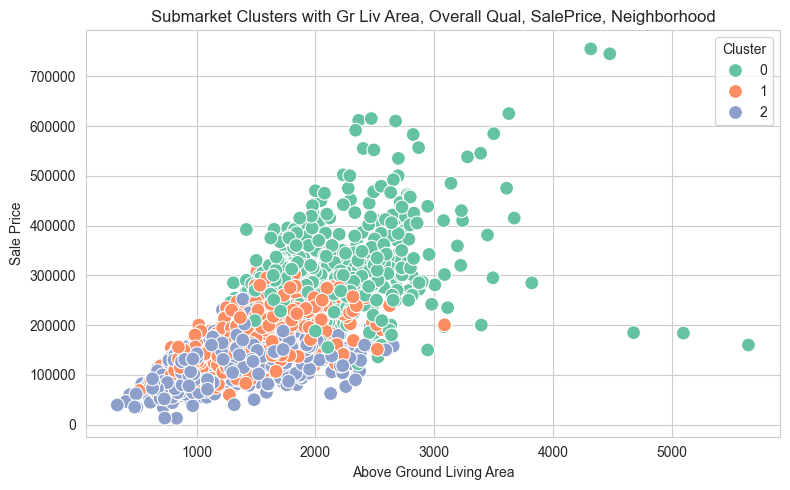

ValueError: could not convert string to float: 'RL'

In [37]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Ames dataset (replace with actual path if needed)
# df = pd.read_csv("AmesHousing.csv")

# Simulated dataset example (replace with your full dataset)
df = df_cleaned.copy()

# Encode neighborhood as numeric
df['Neighborhood_Code'] = df['Neighborhood'].astype('category').cat.codes

# Select clustering features
features = df[['Gr Liv Area', 'Overall Qual', 'SalePrice', 'Neighborhood_Code']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['SubmarketCluster'] = kmeans.fit_predict(X_scaled)


# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', hue='SubmarketCluster', palette='Set2', s=100)
plt.title('Submarket Clusters with Gr Liv Area, Overall Qual, SalePrice, Neighborhood')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()



# Create a dataset without location features

# Split into training (80%) and test (20%) sets

# Define features (X) and target variable (y)
df=df_cleaned.copy()
X = df.drop(columns=[target,'Neighborhood'])  # Independent variables
y = df[target]  # Dependent variable

# 3. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.4f}")

One-Hot Encoding
df_encoded = pd.get_dummies(df[['Neighborhood']])
    Creates a separate binary column for each neighborhood (e.g. Neighborhood_NAmes, Neighborhood_CollgCr, etc.).

    Each row will have a 1 in just one of these columns, and 0s in the rest.

📈 Pros:

    No implied order or ranking — neighborhoods are treated as purely categorical.

    Preserves distinctiveness between categories, especially useful in linear models or clustering.

⚠️ Cons:

    Increases dimensionality: if you have 25 neighborhoods, you get 25 new columns.

    Can create sparse matrices, which may slow training or overfit if data is limited.

Use Case	                 Best Choice	                        Why
Tree-based models	        Either works (but prefer label + SHAP)	They handle label-encoded categories well — no real need for one-hot.
Linear models or clustering	✅ One-Hot Encoding	                   Prevents false numeric relationships and supports meaningful distance measures.
Clustering (like KMeans)	✅ One-Hot Encoding	                   Distance-based algorithms require proper representation of category identity.

We are using clustering and SHAP — so:

    Use label encoding if you're feeding it to tree-based models where SHAP will explain decisions.

    Use one-hot encoding for clustering, so K-Means doesn't misinterpret the distance between category IDs.

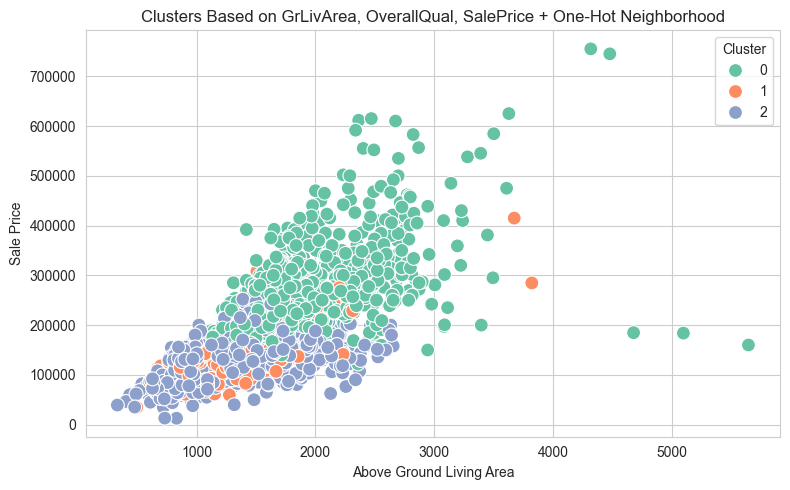

In [35]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Ames-like dataset (replace with full dataset for real analysis)
df = pd.DataFrame({
    'GrLivArea': [1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200],
    'SalePrice': [150000, 165000, 180000, 200000, 215000, 230000, 250000, 270000, 290000, 310000],
    'OverallQual': [5, 6, 6, 7, 7, 8, 8, 9, 9, 10],
    'Neighborhood': ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst',
                     'NridgHt', 'Sawyer', 'Gilbert', 'NWAmes', 'BrkSide']
})
df = df_cleaned.copy()
# --- Step 1: One-hot encode the 'Neighborhood' column
df_encoded = pd.get_dummies(df[['Neighborhood']])

# --- Step 2: Combine selected features with one-hot encoded neighborhood
df_cluster_input = pd.concat([df[['Gr Liv Area', 'Overall Qual', 'SalePrice']], df_encoded], axis=1)

# --- Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_input)

# --- Step 4: Apply KMeans clustering
optimal_k = 3  # you can adjust based on elbow method if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['SubmarketCluster_OneHotNBH'] = kmeans.fit_predict(X_scaled)

# --- Step 5: Plot the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Gr Liv Area',
    y='SalePrice',
    hue='SubmarketCluster_OneHotNBH',
    palette='Set2',
    s=100
)
plt.title('Clusters Based on GrLivArea, OverallQual, SalePrice + One-Hot Neighborhood')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()
